### I. Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import ImageFont
from PIL import Image, ImageDraw
from tqdm import tqdm
import os

In [2]:
def loadFonts():
    return list(filter(lambda x: 'tf' in x, os.listdir('Fonts')))
FONTS = loadFonts()
W, H = 28,28

In [3]:
def getImage(character, font, shape, offsets, rotation):
    img=Image.new("L", shape, color = 0)
    draw = ImageDraw.Draw(img)
    w, h = font.getsize(character)
    position = ((shape[0]-w)/2 + offsets[0],(shape[1]-h)/2 + offsets[1])
    draw.text(position,character,fill=255,font=font, align = 'center')
    draw = ImageDraw.Draw(img)
    return img.rotate(rotation)

### II. Examples

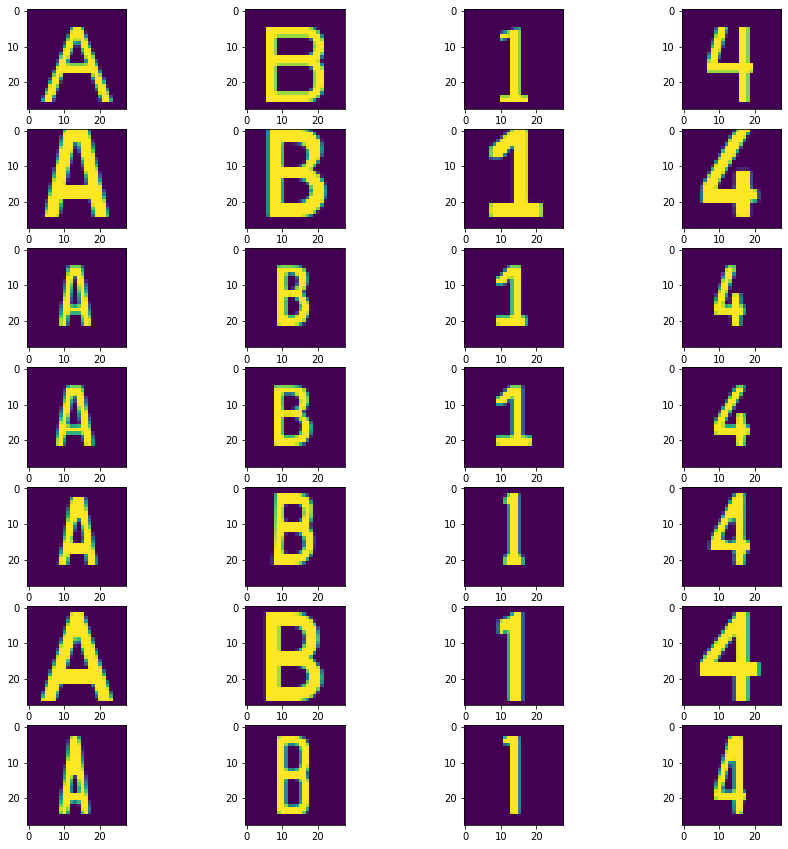

In [4]:
rotation = 0
offsets  = (0,-2)
fig=plt.figure(figsize=(15, 15))
characters = ['A', 'B', '1', '4']
columns = len(FONTS)
rows = len(characters)
for i, font_name in enumerate(FONTS):
    font = ImageFont.truetype(f'./Fonts/{font_name}', size = 28)
    for j, character in enumerate(characters):
        fig.add_subplot(columns, rows, i*rows + j + 1)
        img = getImage(character, font, (W, H), offsets, rotation)
        plt.imshow(img)
plt.show()

### III Generate CSV

In [5]:
def labelToChar(label):
    if label < 10:
        return chr(label + 48)
    return chr(label + 55)

In [9]:
f = open('Data/font_generated_data.csv', 'w+')
w_offset_range = range(-4,5,2)
h_offset_range = range(-6, 1, 2)
rotation_range = range(-8,9,2)
label_range = range(36)
n_images = len(w_offset_range) * len(h_offset_range) * len(rotation_range) * len(label_range) * len(FONTS)
pbar = tqdm(desc="generating images", total = n_images, position = 0)
for font_name in FONTS:
    font = ImageFont.truetype(f'./Fonts/{font_name}', size = 28)
    for w_offset in w_offset_range:
        for h_offset in h_offset_range:
            for rotation in rotation_range:
                for label in label_range:
                    img = getImage(labelToChar(label), font, (W, H), (w_offset, h_offset), rotation)
                    line = str(label) + ',' + ','.join(map(str,np.array(img).reshape(W*H))) + '\n'
                    f.write(line)
                    pbar.update(1)
f.close()

generating images: 100%|██████████| 45360/45360 [00:55<00:00, 1073.29it/s]